# Derivative of Matrix

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load image 

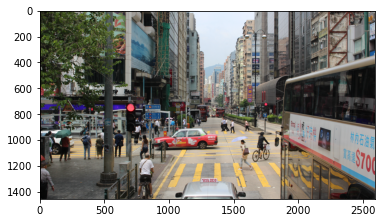

In [2]:
I = img.imread('C:/Users/이윤정/Desktop/2021_1/ML/03/yjhongkong_15.jpg')

plt.imshow(I)

## check the size of image

In [3]:
n_row = I.shape[0]
n_col = I.shape[1]

# print(I)

print(I.shape)

(1456, 2592, 3)


## convert the input image into gray scale if it is color

In [4]:
if I.shape[2] == 3:
    I = I.mean(axis=2)
    
# print(I)
# print(I.shape)

## normalize input image so that the range of image is $[0, 1]$

In [5]:
I = (I - I.min(axis=0)) / (I.max(axis=0) - I.min(axis=0))

# print(I)
# print(I.shape)

```git commit -a -m "load image" ``` \
```git push origin master```

## generate a matrix to compute the derivative in $x$-direction

In [6]:
# n_row, n_col 위에 구해져 있음
Dx = np.zeros((n_col, n_col))
for i in range(n_col):
    for j in range(n_col):
        if i==j:
            Dx[i][j] = -1            
            if i < n_col-1:
                Dx[i+1][j] = 1
# print(Dx)
# print(Dx.shape)

## compute the derivative of $I$ with respect to $x$-direction

In [7]:
# Dx와 I를 곱한 Ix가 I에 대한 미분이 되도록
Ix = I @ Dx

# print(Ix)

```git commit -a -m "compute the derivative in x-direction"``` \
```git push origin master```

## generate a matrix to compute the derivative in $y$-direction

In [8]:
Dy = np.zeros((n_row, n_row))
for i in range(n_row):
    for j in range(n_row):
        if i==j:
            Dy[i][j] = -1
            if i<n_row-1:
                Dy[i][j+1] = 1
                
# print(Dy)
# print(Dy.shape)

## compute the derivative of $I$ with respect to $y$-direction

In [9]:
Iy = Dy @ I

# print(Iy)

```git commit -a -m "compute the derivative in y-direction"``` \
```git push origin master```

## compute $L_2^2$ of the gradient of $I$

In [10]:
norm_gradient = Ix**2 + Iy**2

# print(norm_gradient)

## define functions for the visualization

In [11]:
# imshow : option으로 log scale 설정해서 이미지 출력해야함
# print(I.shape)

def plot_image(I):
    
    plt.figure(figsize=(10,10))
    #plt.imshow( , , )
    plt.imshow(I, cmap='gray', norm=colors.LogNorm())
    plt.title('input image')
    plt.axis('off')
        
def plot_image_derivative_x(Ix):
    
    plt.figure(figsize=(10,10))
    #plt.imshow(Ix)
    plt.imshow(Ix, cmap='gray', norm=colors.LogNorm())
    plt.title('image derivative of x')
    plt.axis('off')

    
def plot_image_derivative_y(Iy):
    
    plt.figure(figsize=(10,10))
    plt.imshow(Iy, cmap='gray', norm=colors.LogNorm())
    plt.title('image derivative of y')
    plt.axis('off')

    
def plot_norm_gradient(norm_gradient):

    plt.figure(figsize=(10,10))
    plt.imshow(norm_gradient, cmap='gray', norm=colors.LogNorm())
    plt.title('norm gradient')
    plt.axis('off')

```git commit -a -m "define functions for the visualization"``` \
```git push origin master```

# ###################################################################

# # results

# ###################################################################

# # 01. plot the input image in gray scale

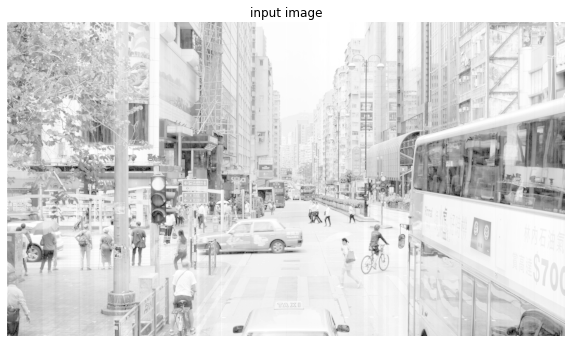

In [12]:
plot_image(I)

# # 02. plot the derivative $I_x$ of input image in x-direction

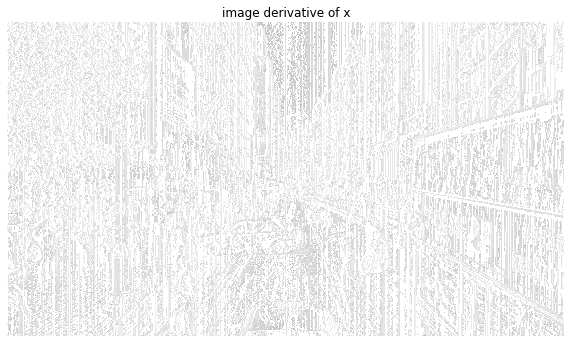

In [13]:
plot_image_derivative_x(Ix)

# # 03. plot the derivative $I_y$ of input image in y-direction

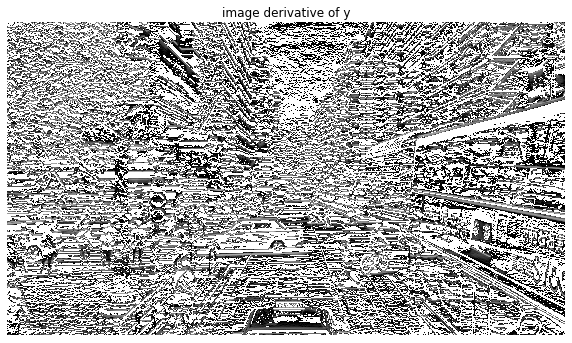

In [14]:
plot_image_derivative_y(Iy)

# # 04. plot $L_2^2$ norm $I_x^2 + I_y^2$ of the gradient of input image

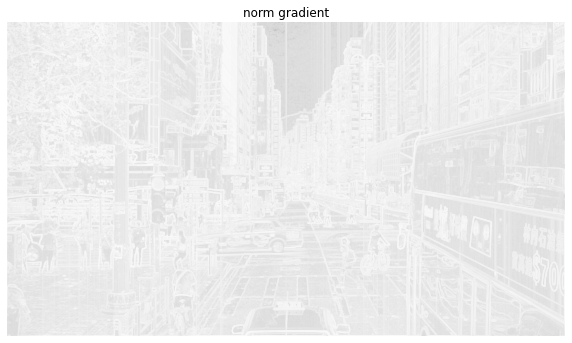

In [15]:
plot_norm_gradient(norm_gradient)